## Lab Random Forests

In [42]:
import pandas as pd # consider using the up to date files in the folder
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [2]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [3]:
from sklearn.utils import resample

category_0 = data[data['TARGET_B'] == 0]
category_1 = data[data['TARGET_B'] == 1]

## Upscaling

In [4]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [5]:
print(category_0.shape)
print(category_1_oversampled.shape)

(90569, 339)
(90569, 339)


In [6]:
data_up = pd.concat([category_0, category_1_oversampled], axis=0)

In [7]:
data_up['TARGET_B'].value_counts()

0    90569
1    90569
Name: TARGET_B, dtype: int64

In [8]:
data_up = data_up.sample(frac =1) #randomize the rows
data_up = data_up.reset_index(drop=True)
print(data_up.shape)

(181138, 339)


In [9]:
# X-y Split
X = data_up.drop(columns=['TARGET_B'])
y = data_up['TARGET_B']

In [10]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

In [11]:
# we onehot encode the categoricals so we can use the same dataset to perform a regression later (in the lab).
# it is not needed for a DecisionTree or RandomForest model
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
print(X_train.shape)

(144910, 355)


In [14]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [15]:
y_test

63554     0
93091     0
85771     0
45065     0
77682     1
         ..
52227     0
29914     1
145073    0
161935    1
32868     0
Name: TARGET_B, Length: 36228, dtype: int64

In [16]:
y_test_regression

63554      0.0
93091      0.0
85771      0.0
45065      0.0
77682     14.0
          ... 
52227      0.0
29914     20.0
145073     0.0
161935     5.0
32868      0.0
Name: TARGET_D, Length: 36228, dtype: float64

In [30]:
#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
#clf.fit(X_train, y_train)
#print(clf.score(X_train, y_train))
#print(clf.score(X_test, y_test))

0.6180663860327099
0.6120956166501049


In [18]:
# For cross validation
#from sklearn.model_selection import cross_val_score
#clf = RandomForestClassifier(max_depth=5,
                             #min_samples_split=20,
                             #min_samples_leaf =20)
#cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
#print(np.mean(cross_val_scores))


0.6134152232420124


In [19]:
cross_val_scores

array([0.61576151, 0.6140363 , 0.61307018, 0.61093092, 0.60948175,
       0.61307018, 0.619833  , 0.60810158, 0.61679663, 0.61307018])

In [ ]:
predictions = clf.predict(X_test) 

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("precision: ",precision_score(y_test,predictions))
print("recall: ",recall_score(y_test,predictions))
print("f1: ",f1_score(y_test,predictions))

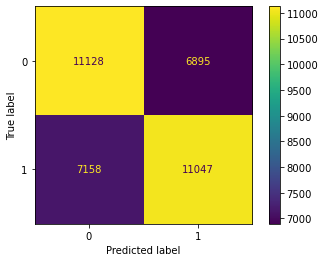

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  

'''
Business comments: There are more false negatives than false positives. This means, with this model, more donors who
did donate in the past are missed than people who did not donate are falsely adressed (false positives).
This is unsatisfying from a business perspectives as the false negatives are more likely missed opportunities
while the false positives caused damaged is limited.'''

## Part II Final regression model

In [20]:
# Create new dataframe with all those who donated
donors = data[data['TARGET_B'] == 1]

In [22]:
donors = donors.drop(['TARGET_B'], axis = 1)

## Feature Selection

In [60]:
print(donors.shape)
donors.head()

(4843, 338)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.0,15,10,2.0,7.0,5.0,12,4.066667,82943,1,3,3,other,12,H,F,3,L,D,A,S,1,87,1,36,1,88,1,94,4,96,3,87,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.0,11,6,2.0,10.0,7.0,9,6.181818,190313,1,3,14,TX,35,H,M,3,L,D,A,T,1,90,1,0,2,90,4,93,1,95,12,90,4,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,7

In [61]:
# Splitting into numerical and categorical
numerical = donors.select_dtypes(np.number)
categorical = donors.select_dtypes(np.object)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)

In [63]:
#column_names = list(numerical.columns.values)

In [56]:
numerical_scaled = numerical_scaled.to_numpy

In [57]:
X = numerical_scaled
y = donors['TARGET_D']

In [59]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

ValueError: Expected 2D array, got scalar array instead:
array=<bound method DataFrame.to_numpy of             0         1         2         3         4         5         6    \
0      0.000000  0.608247  0.666667  1.000000  0.000000  0.000000  0.393939   
1      0.000014  0.463918  0.833333  1.000000  0.066390  0.000000  0.151515   
2      0.000014  0.624862  0.333333  0.111111  0.008299  0.000000  0.202020   
3      0.000000  0.711340  0.000000  0.444444  0.008299  0.000000  0.232323   
4      0.000000  0.793814  0.333333  0.222222  0.248963  0.010101  0.282828   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.000014  0.624862  0.666667  1.000000  0.000000  0.141414  0.363636   
95408  0.000014  0.484536  1.000000  1.000000  0.004149  0.000000  0.313131   
95409  0.000014  0.608247  0.666667  1.000000  0.000000  0.000000  0.181818   
95410  0.000000  0.587629  1.000000  1.000000  0.000000  0.000000  0.282828   
95411  0.000028  0.814433  0.666667  0.888889  0.012448  0.010101  0.333333   

            7         8         9         10        11        12        13   \
0      0.343434  0.181818  0.101010  0.020202  0.011494  0.555556  0.010051   
1      0.555556  0.111111  0.060606  0.020202  0.011494  1.000000  0.036585   
2      0.292929  0.333333  0.060606  0.080808  0.011494  0.111111  0.070931   
3      0.141414  0.313131  0.030303  0.000000  0.034483  0.000000  0.006484   
4      0.090909  0.535354  0.262626  0.030303  0.022989  1.000000  0.025532   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.474747  0.111111  0.070707  0.080808  0.149425  1.000000  0.277403   
95408  0.434343  0.191919  0.040404  0.010101  0.000000  1.000000  0.012705   
95409  0.464646  0.202020  0.070707  0.232323  0.000000  1.000000  0.005593   
95410  0.353535  0.202020  0.090909  0.010101  0.011494  0.777778  0.017690   
95411  0.222222  0.272727  0.080808  0.101010  0.034483  0.888889  0.039868   

            14        15        16        17        18        19        20   \
0      0.011108  0.009378  0.000000  0.353535  0.656566  0.474747  0.535354   
1      0.039552  0.028190  1.000000  0.000000  0.000000  0.505051  0.505051   
2      0.085837  0.075389  0.000000  0.020202  0.989899  0.494949  0.515152   
3      0.006732  0.006186  0.000000  0.080808  0.929293  0.545455  0.464646   
4      0.026382  0.021495  1.000000  0.000000  0.000000  0.464646  0.545455   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.305142  0.283507  1.000000  0.000000  0.000000  0.505051  0.505051   
95408  0.013549  0.010197  0.969697  0.000000  0.040404  0.515152  0.494949   
95409  0.005512  0.005790  1.000000  0.000000  0.000000  0.535354  0.474747   
95410  0.018177  0.014349  1.000000  0.000000  0.000000  0.474747  0.535354   
95411  0.050156  0.037906  1.000000  0.000000  0.000000  0.484848  0.525253   

            21        22        23        24        25        26        27   \
0      0.929293  0.010101  0.000000  0.000000  0.111111  0.000000  0.000000   
1      0.676768  0.000000  0.000000  0.313131  0.060606  0.181818  0.027778   
2      0.969697  0.020202  0.000000  0.000000  0.020202  0.000000  0.000000   
3      0.616162  0.000000  0.000000  0.111111  0.323232  0.272727  0.027778   
4      0.020202  0.989899  0.000000  0.000000  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.787879  0.101010  0.060606  0.040404  0.050505  0.000000  0.000000   
95408  0.919192  0.030303  0.000000  0.020202  0.060606  0.045455  0.000000   
95409  0.828283  0.141414  0.000000  0.010101  0.090909  0.000000  0.000000   
95410  0.929293  0.010101  0.010101  0.050505  0.080808  0.000000  0.013889   
95411  0.868687  0.121212  0.000000  0.010101  0.010101  0.000000  0.000000   

            28        29        30   31   32        33        34        35   \
0      0.000000  0.000000  0.000000  0.0  0.0  0.113402  0.000000  0.000000   
1      0.060606  0.059701  0.304348  0.0  0.0  0.020619  0.000000  0.012346   
2      0.000000  0.000000  0.000000  0.0  0.0  0.020619  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.0  0.0  0.319588  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000   
...         ...       ...       ...  ...  ...       ...       ...       ...   
95407  0.000000  0.014925  0.021739  0.0  0.0  0.030928  0.017544  0.000000   
95408  0.010101  0.000000  0.000000  0.0  0.0  0.051546  0.000000  0.000000   
95409  0.000000  0.000000  0.000000  0.0  0.0  0.092784  0.000000  0.000000   
95410  0.020202  0.000000  0.021739  0.0  0.0  0.051546  0.000000  0.000000   
95411  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.000000   

            36        37        38        39        40        41        42   \
0      0.000000  0.464286  0.571429  0.607143  0.476190  0.595238  0.642857   
1      0.046512  0.404762  0.488095  0.511905  0.380952  0.500000  0.535714   
2      0.000000  0.416667  0.511905  0.547619  0.440476  0.535714  0.583333   
3      0.011628  0.380952  0.476190  0.523810  0.404762  0.511905  0.559524   
4      0.000000  0.392857  0.535714  0.595238  0.428571  0.547619  0.595238   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.023256  0.333333  0.416667  0.452381  0.345238  0.452381  0.488095   
95408  0.011628  0.357143  0.476190  0.476190  0.333333  0.488095  0.511905   
95409  0.000000  0.333333  0.416667  0.440476  0.357143  0.488095  0.523810   
95410  0.034884  0.404762  0.500000  0.535714  0.428571  0.535714  0.583333   
95411  0.000000  0.404762  0.476190  0.500000  0.392857  0.511905  0.535714   

            43        44        45        46        47        48        49   \
0      0.333333  0.313131  0.424242  0.272727  0.111111  0.141414  0.181818   
1      0.426667  0.333333  0.464646  0.212121  0.131313  0.141414  0.333333   
2      0.306667  0.353535  0.404040  0.252525  0.131313  0.202020  0.191919   
3      0.333333  0.454545  0.353535  0.202020  0.151515  0.252525  0.171717   
4      0.360000  0.343434  0.434343  0.232323  0.141414  0.212121  0.131313   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.400000  0.454545  0.373737  0.181818  0.161616  0.313131  0.252525   
95408  0.520000  0.333333  0.424242  0.252525  0.090909  0.191919  0.434343   
95409  0.426667  0.464646  0.383838  0.171717  0.131313  0.343434  0.212121   
95410  0.333333  0.383838  0.404040  0.222222  0.121212  0.212121  0.212121   
95411  0.386667  0.404040  0.373737  0.232323  0.080808  0.232323  0.292929   

            50        51        52        53        54        55        56   \
0      0.171717  0.131313  0.111111  0.151515  0.121212  0.111111  0.343434   
1      0.232323  0.101010  0.040404  0.020202  0.111111  0.161616  0.363636   
2      0.161616  0.131313  0.101010  0.080808  0.151515  0.141414  0.303030   
3      0.171717  0.121212  0.070707  0.070707  0.202020  0.171717  0.303030   
4      0.151515  0.202020  0.121212  0.050505  0.131313  0.151515  0.343434   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.151515  0.080808  0.030303  0.010101  0.202020  0.181818  0.313131   
95408  0.171717  0.070707  0.040404  0.020202  0.101010  0.161616  0.353535   
95409  0.090909  0.090909  0.090909  0.040404  0.212121  0.171717  0.323232   
95410  0.181818  0.121212  0.070707  0.090909  0.131313  0.161616  0.343434   
95411  0.171717  0.121212  0.080808  0.030303  0.161616  0.181818  0.323232   

            57        58        59        60        61        62        63   \
0      0.252525  0.181818  0.262626  0.101010  0.232323  0.181818  0.333333   
1      0.222222  0.151515  0.121212  0.010101  0.050505  0.040404  0.212121   
2      0.222222  0.191919  0.252525  0.101010  0.232323  0.212121  0.353535   
3      0.141414  0.191919  0.252525  0.111111  0.232323  0.232323  0.272727   
4      0.191919  0.191919  0.313131  0.070707  0.272727  0.161616  0.262626   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.181818  0.131313  0.070707  0.030303  0.050505  0.202020  0.323232   
95408  0.232323  0.161616  0.090909  0.020202  0.070707  0.101010  0.202020   
95409  0.202020  0.101010  0.181818  0.070707  0.171717  0.272727  0.292929   
95410  0.202020  0.171717  0.202020  0.040404  0.161616  0.090909  0.262626   
95411  0.202020  0.141414  0.161616  0.020202  0.131313  0.090909  0.343434   

            64        65        66        67        68        69        70   \
0      0.494949  0.282828  0.121212  0.040404  0.616162  0.070707  0.164384   
1      0.757576  0.555556  0.232323  0.090909  0.696970  0.040404  0.041096   
2      0.444444  0.222222  0.060606  0.020202  0.636364  0.090909  0.123288   
3      0.505051  0.303030  0.151515  0.080808  0.636364  0.090909  0.082192   
4      0.575758  0.363636  0.242424  0.141414  0.424242  0.171717  0.123288   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.484848  0.282828  0.101010  0.040404  0.585859  0.151515  0.041096   
95408  0.707071  0.525253  0.252525  0.060606  0.737374  0.040404  0.027397   
95409  0.444444  0.313131  0.141414  0.050505  0.454545  0.191919  0.068493   
95410  0.656566  0.414141  0.171717  0.060606  0.565657  0.090909  0.109589   
95411  0.575758  0.333333  0.090909  0.030303  0.737374  0.060606  0.041096   

            71        72        73        74        75        76        77   \
0      0.191919  0.304615  0.394286  0.979798  0.959596  0.020202  0.020202   
1      0.242424  0.487692  0.514286  1.000000  1.000000  0.000000  0.000000   
2      0.191919  0.281538  0.362857  0.696970  0.696970  0.010101  0.060606   
3      0.232323  0.306154  0.404286  0.858586  0.838384  0.030303  0.040404   
4      0.333333  0.361538  0.461429  1.000000  0.989899  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.242424  0.300000  0.387143  0.545455  0.383838  0.080808  0.323232   
95408  0.202020  0.472308  0.494286  0.898990  0.888889  0.010101  0.010101   
95409  0.313131  0.275385  0.382857  0.969697  0.959596  0.010101  0.020202   
95410  0.272727  0.403077  0.462857  1.000000  1.000000  0.000000  0.000000   
95411  0.181818  0.350769  0.418571  0.989899  0.949495  0.000000  0.010101   

            78        79        80        81        82        83        84   \
0      0.000000  0.000000  0.070707  0.070707  0.000000  0.079833  0.105833   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.911333  0.869667   
2      0.050505  0.030303  0.030303  0.030303  0.000000  0.082833  0.091000   
3      0.010101  0.000000  0.020202  0.000000  0.020202  0.166667  0.210500   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.096000  0.099000   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.242424  0.141414  0.000000  0.000000  0.000000  0.164667  0.170833   
95408  0.000000  0.000000  0.000000  0.000000  0.000000  0.279833  0.287167   
95409  0.010101  0.000000  0.000000  0.000000  0.000000  0.062667  0.062833   
95410  0.000000  0.000000  0.050505  0.040404  0.010101  0.403500  0.409833   
95411  0.010101  0.010101  0.000000  0.000000  0.000000  0.156333  0.174833   

            85        86        87        88        89        90        91   \
0      0.230769  0.153846  0.868687  0.141414  0.969697  0.040404  0.070707   
1      0.923077  0.769231  0.969697  0.040404  0.979798  0.030303  0.090909   
2      0.153846  0.076923  0.787879  0.222222  0.939394  0.070707  0.181818   
3      0.153846  0.076923  0.484848  0.525253  0.939394  0.070707  0.060606   
4      0.307692  0.230769  0.909091  0.101010  0.979798  0.030303  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.461538  0.461538  0.565657  0.444444  0.898990  0.111111  0.030303   
95408  0.230769  0.230769  0.888889  0.121212  0.979798  0.030303  0.000000   
95409  0.307692  0.230769  0.666667  0.343434  0.959596  0.050505  0.101010   
95410  0.846154  0.769231  0.888889  0.121212  1.000000  0.010101  0.000000   
95411  0.384615  0.384615  0.919192  0.090909  0.939394  0.070707  0.101010   

            92        93        94        95        96        97        98   \
0      0.383838  0.808081  0.707071  0.323232  0.848485  0.161616  0.060606   
1      0.595960  0.949495  0.888889  0.555556  0.959596  0.050505  0.040404   
2      0.363636  0.767677  0.656566  0.303030  0.868687  0.141414  0.070707   
3      0.363636  0.737374  0.616162  0.303030  0.848485  0.161616  0.060606   
4      0.424242  0.828283  0.494949  0.222222  0.929293  0.080808  0.202020   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.444444  0.727273  0.565657  0.323232  0.838384  0.171717  0.121212   
95408  0.636364  0.898990  0.858586  0.606061  0.969697  0.040404  0.020202   
95409  0.373737  0.646465  0.434343  0.212121  0.808081  0.202020  0.161616   
95410  0.444444  0.858586  0.717172  0.363636  0.848485  0.161616  0.080808   
95411  0.505051  0.898990  0.808081  0.444444  0.959596  0.050505  0.050505   

        99        100       101       102       103       104       105  \
0      0.04  0.050505  0.090909  0.151515  0.030303  0.226667  0.505051   
1      0.02  0.030303  0.050505  0.040404  0.020202  0.240000  0.444444   
2      0.04  0.050505  0.111111  0.171717  0.030303  0.226667  0.606061   
3      0.06  0.030303  0.212121  0.121212  0.040404  0.173333  0.363636   
4      0.06  0.171717  0.090909  0.232323  0.010101  0.013333  0.010101   
...     ...       ...       ...       ...       ...       ...       ...   
95407  0.06  0.101010  0.161616  0.151515  0.080808  0.253333  0.555556   
95408  0.02  0.010101  0.070707  0.050505  0.010101  0.373333  0.585859   
95409  0.04  0.141414  0.212121  0.202020  0.090909  0.266667  0.494949   
95410  0.04  0.060606  0.090909  0.121212  0.060606  0.253333  0.565657   
95411  0.02  0.040404  0.070707  0.080808  0.020202  0.266667  0.555556   

            106       107       108       109       110       111       112  \
0      0.252525  0.000000  0.000000  0.000000  0.020202  0.070707  0.131313   
1      0.050505  0.000000  0.000000  0.000000  0.979798  0.989899  0.989899   
2      0.181818  0.000000  0.010101  0.000000  0.000000  0.010101  0.060606   
3      0.131313  0.000000  0.000000  0.000000  0.101010  0.252525  0.505051   
4      0.000000  0.381818  0.585859  0.191919  0.000000  0.010101  0.020202   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.050505  0.054545  0.060606  0.000000  0.020202  0.101010  0.494949   
95408  0.050505  0.036364  0.020202  0.000000  0.181818  0.717172  0.888889   
95409  0.121212  0.127273  0.070707  0.010101  0.000000  0.000000  0.000000   
95410  0.161616  0.000000  0.000000  0.000000  0.898990  0.969697  1.000000   
95411  0.111111  0.054545  0.080808  0.010101  0.030303  0.141414  0.424242   

            113       114       115       116       117       118       119  \
0      0.272727  0.474747  0.000000  0.010101  0.616162  0.682353  0.677778   
1      0.989899  1.000000  0.949495  0.000000  0.838384  0.894118  0.811111   
2      0.181818  0.505051  0.000000  0.040404  0.363636  0.576471  0.566667   
3      0.696970  0.929293  0.101010  0.151515  0.424242  0.647059  0.555556   
4      0.161616  0.676768  0.000000  0.020202  0.454545  0.611765  0.588889   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.737374  0.929293  0.000000  0.040404  0.404040  0.611765  0.588889   
95408  0.919192  0.979798  0.050505  0.010101  0.777778  0.964706  0.833333   
95409  0.010101  0.090909  0.000000  0.020202  0.454545  0.600000  0.600000   
95410  1.000000  1.000000  0.090909  0.000000  0.909091  0.764706  0.755556   
95411  0.757576  0.949495  0.010101  0.000000  0.828283  0.764706  0.744444   

            120    121       122       123       124       125       126  \
0      0.245902  0.100  0.020202  0.000000  0.000000  0.141414  0.010101   
1      0.344262  0.125  0.000000  0.000000  0.000000  0.040404  0.000000   
2      0.229508  0.125  0.040404  0.020202  0.242424  0.111111  0.020202   
3      0.245902  0.125  0.040404  0.000000  0.090909  0.424242  0.040404   
4      0.262295  0.150  0.000000  0.000000  0.000000  0.090909  0.000000   
...         ...    ...       ...       ...       ...       ...       ...   
95407  0.245902  0.100  0.242424  0.080808  0.131313  0.141414  0.151515   
95408  0.327869  0.100  0.010101  0.000000  0.101010  0.070707  0.010101   
95409  0.229508  0.125  0.020202  0.000000  0.000000  0.313131  0.020202   
95410  0.295082  0.125  0.000000  0.000000  0.000000  0.121212  0.000000   
95411  0.262295  0.100  0.010101  0.000000  0.010101  0.090909  0.000000   

            127       128       129       130       131       132       133  \
0      0.000000  0.000000  0.020202  0.050505  0.171717  0.737374  0.000000   
1      0.000000  0.000000  0.919192  0.919192  0.919192  0.949495  0.478632   
2      0.030303  0.060606  0.000000  0.020202  0.090909  0.444444  0.000000   
3      0.000000  0.050505  0.010101  0.080808  0.171717  0.343434  0.997863   
4      0.000000  0.000000  0.252525  0.585859  0.747475  0.838384  0.534188   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.121212  0.030303  0.696970  0.848485  0.929293  0.979798  0.040598   
95408  0.000000  0.050505  0.161616  0.262626  0.444444  0.797980  0.358974   
95409  0.000000  0.000000  0.030303  0.343434  0.787879  0.919192  0.431624   
95410  0.000000  0.000000  0.888889  0.888889  0.909091  0.919192  0.933226   
95411  0.000000  0.000000  0.494949  0.656566  0.848485  0.939394  0.982906   

            134       135       136       137       138       139       140  \
0      0.271889  0.774120  0.204667  0.212000  0.232667  0.252000  0.073818   
1      0.019969  0.911464  0.725333  0.730667  0.684000  0.691333  0.207279   
2      0.431644  0.587968  0.167333  0.194667  0.194667  0.226667  0.066329   
3      0.102919  0.978434  0.257333  0.258667  0.264000  0.282000  0.086693   
4      0.195084  0.599319  0.160000  0.166667  0.195333  0.214000  0.056359   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.000000  0.843360  0.288667  0.320667  0.332667  0.356667  0.107762   
95408  0.308756  0.701476  0.537333  0.557333  0.534667  0.566000  0.152060   
95409  0.093702  0.625426  0.175333  0.176000  0.212667  0.230000  0.069779   
95410  0.019969  0.911464  0.368000  0.362667  0.378667  0.370667  0.091381   
95411  0.545315  0.624291  0.300667  0.316000  0.332667  0.346000  0.095684   

            141       142       143       144       145       146   147  \
0      0.131313  0.232323  0.232323  0.232323  0.151515  0.010101  0.00   
1      0.020202  0.060606  0.020202  0.050505  0.151515  0.141414  0.26   
2      0.323232  0.181818  0.202020  0.151515  0.121212  0.020202  0.00   
3      0.272727  0.121212  0.040404  0.262626  0.222222  0.050505  0.00   
4      0.242424  0.292929  0.232323  0.131313  0.040404  0.040404  0.00   
...         ...       ...       ...       ...       ...       ...   ...   
95407  0.111111  0.131313  0.131313  0.212121  0.222222  0.131313  0.08   
95408  0.080808  0.090909  0.070707  0.060606  0.111111  0.292929  0.26   
95409  0.212121  0.262626  0.202020  0.181818  0.121212  0.000000  0.06   
95410  0.070707  0.040404  0.111111  0.181818  0.383838  0.151515  0.10   
95411  0.040404  0.101010  0.191919  0.232323  0.313131  0.080808  0.04   

            148       149       150       151       152       153       154  \
0      0.000000  0.010101  0.040404  0.252525  0.242424  0.262626  0.171717   
1      0.163934  0.333333  0.020202  0.050505  0.020202  0.050505  0.151515   
2      0.000000  0.010101  0.202020  0.191919  0.242424  0.181818  0.161616   
3      0.000000  0.040404  0.353535  0.050505  0.060606  0.121212  0.303030   
4      0.000000  0.020202  0.212121  0.303030  0.222222  0.161616  0.040404   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.032787  0.020202  0.090909  0.111111  0.111111  0.212121  0.242424   
95408  0.032787  0.151515  0.101010  0.000000  0.080808  0.020202  0.131313   
95409  0.000000  0.000000  0.262626  0.181818  0.171717  0.111111  0.212121   
95410  0.049180  0.000000  0.040404  0.060606  0.151515  0.191919  0.383838   
95411  0.016393  0.010101  0.020202  0.101010  0.191919  0.212121  0.343434   

            155   156       157       158       159       160       161  \
0      0.020202  0.00  0.000000  0.020202  0.282828  0.040404  0.515152   
1      0.141414  0.28  0.101010  0.323232  0.060606  0.020202  0.666667   
2      0.020202  0.00  0.000000  0.010101  0.282828  0.080808  0.313131   
3      0.060606  0.00  0.000000  0.050505  0.222222  0.141414  0.262626   
4      0.050505  0.00  0.000000  0.030303  0.353535  0.080808  0.111111   
...         ...   ...       ...       ...       ...       ...       ...   
95407  0.161616  0.08  0.020202  0.020202  0.090909  0.060606  0.707071   
95408  0.353535  0.32  0.030303  0.131313  0.080808  0.050505  0.616162   
95409  0.000000  0.12  0.000000  0.000000  0.101010  0.131313  0.262626   
95410  0.131313  0.08  0.030303  0.000000  0.252525  0.020202  0.464646   
95411  0.090909  0.06  0.010101  0.010101  0.191919  0.010101  0.545455   

            162       163       164       165       166       167       168  \
0      0.010101  0.464646  0.545455  0.030303  0.888889  0.080808  0.000000   
1      0.030303  0.565657  0.444444  0.090909  0.808081  0.141414  0.000000   
2      0.111111  0.383838  0.626263  0.080808  0.747475  0.222222  0.000000   
3      0.202020  0.464646  0.545455  0.030303  0.585859  0.363636  0.000000   
4      0.141414  0.202020  0.808081  0.040404  0.737374  0.222222  0.010101   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.060606  0.636364  0.373737  0.272727  0.767677  0.151515  0.020202   
95408  0.070707  0.838384  0.171717  0.363636  0.808081  0.040404  0.040404   
95409  0.262626  0.434343  0.575758  0.030303  0.838384  0.171717  0.000000   
95410  0.030303  0.434343  0.575758  0.090909  0.808081  0.111111  0.000000   
95411  0.030303  0.666667  0.343434  0.303030  0.858586  0.131313  0.010101   

            169  170  171   172       173       174       175       176  \
0      0.000000  0.0  0.0  0.00  0.000000  0.040404  0.010101  0.131313   
1      0.000000  0.0  0.0  0.00  0.000000  0.060606  0.000000  0.020202   
2      0.000000  0.0  0.0  0.00  0.020202  0.020202  0.010101  0.212121   
3      0.000000  0.0  0.0  0.00  0.060606  0.000000  0.000000  0.171717   
4      0.010101  0.0  0.0  0.00  0.030303  0.010101  0.020202  0.010101   
...         ...  ...  ...   ...       ...       ...       ...       ...   
95407  0.020202  0.0  0.0  0.00  0.050505  0.020202  0.010101  0.020202   
95408  0.040404  0.0  0.0  0.00  0.060606  0.050505  0.030303  0.030303   
95409  0.000000  0.0  0.0  0.00  0.000000  0.000000  0.000000  0.252525   
95410  0.000000  0.0  0.0  0.04  0.020202  0.060606  0.000000  0.242424   
95411  0.010101  0.0  0.0  0.00  0.000000  0.010101  0.020202  0.090909   

            177       178       179       180       181       182       183  \
0      0.155556  0.210526  0.020202  0.454545  0.565657  0.646465  0.505051   
1      0.266667  0.421053  0.121212  0.717172  0.707071  0.838384  0.585859   
2      0.211111  0.315789  0.060606  0.616162  0.656566  0.737374  0.595960   
3      0.144444  0.197368  0.000000  0.434343  0.696970  0.818182  0.535354   
4      0.266667  0.355263  0.030303  0.767677  0.616162  0.737374  0.515152   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.200000  0.263158  0.020202  0.696970  0.818182  0.898990  0.737374   
95408  0.277778  0.421053  0.101010  0.616162  0.737374  0.888889  0.565657   
95409  0.188889  0.223684  0.000000  0.696970  0.696970  0.707071  0.696970   
95410  0.200000  0.368421  0.111111  0.525253  0.737374  0.888889  0.606061   
95411  0.211111  0.276316  0.020202  0.747475  0.717172  0.818182  0.636364   

            184       185       186       187       188       189       190  \
0      0.646465  0.444444  0.626263  0.535354  1.000000  0.000000  0.000000   
1      0.818182  0.575758  0.646465  0.575758  1.000000  1.000000  0.000000   
2      0.707071  0.565657  0.787879  0.626263  0.828283  1.000000  0.040404   
3      0.686869  0.454545  0.333333  0.313131  0.000000  1.000000  0.232323   
4      0.656566  0.494949  0.808081  0.313131  0.818182  1.000000  0.101010   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.838384  0.696970  0.696970  0.575758  0.616162  0.949495  0.070707   
95408  0.878788  0.525253  0.484848  0.434343  1.000000  0.000000  0.000000   
95409  0.707071  0.696970  0.777778  0.242424  0.626263  0.000000  0.252525   
95410  0.858586  0.575758  0.707071  0.545455  1.000000  1.000000  0.000000   
95411  0.808081  0.606061  0.666667  0.606061  0.808081  0.717172  0.030303   

            191       192       193       194       195       196       197  \
0      0.090909  0.030303  0.080808  0.131313  0.090909  0.000000  0.054545   
1      0.222222  0.242424  0.040404  0.212121  0.131313  0.046512  0.018182   
2      0.101010  0.050505  0.020202  0.060606  0.121212  0.000000  0.018182   
3      0.171717  0.030303  0.000000  0.060606  0.060606  0.000000  0.000000   
4      0.171717  0.080808  0.020202  0.060606  0.151515  0.069767  0.127273   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.151515  0.161616  0.050505  0.101010  0.212121  0.000000  0.054545   
95408  0.181818  0.313131  0.000000  0.131313  0.171717  0.000000  0.018182   
95409  0.050505  0.131313  0.090909  0.050505  0.222222  0.000000  0.036364   
95410  0.141414  0.161616  0.060606  0.161616  0.171717  0.000000  0.036364   
95411  0.252525  0.181818  0.050505  0.131313  0.141414  0.000000  0.054545   

            198       199       200       201       202       203       204  \
0      0.090909  0.030303  0.151515  0.191919  0.050505  0.040404  0.030303   
1      0.060606  0.000000  0.040404  0.010101  0.000000  0.030303  0.010101   
2      0.090909  0.050505  0.181818  0.202020  0.050505  0.070707  0.060606   
3      0.131313  0.424242  0.121212  0.000000  0.000000  0.000000  0.424242   
4      0.222222  0.020202  0.090909  0.000000  0.070707  0.020202  0.020202   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.111111  0.010101  0.111111  0.020202  0.030303  0.030303  0.010101   
95408  0.020202  0.040404  0.060606  0.000000  0.030303  0.050505  0.010101   
95409  0.141414  0.000000  0.131313  0.090909  0.050505  0.020202  0.000000   
95410  0.121212  0.010101  0.111111  0.020202  0.000000  0.020202  0.010101   
95411  0.060606  0.000000  0.070707  0.020202  0.030303  0.020202  0.010101   

            205       206       207       208       209       210       211  \
0      0.000000  0.030303  0.414141  0.010101  0.000000  0.070707  0.131313   
1      0.000000  0.060606  0.131313  0.010101  0.031250  0.080808  0.181818   
2      0.000000  0.111111  0.333333  0.040404  0.046875  0.020202  0.121212   
3      0.000000  0.060606  0.030303  0.000000  0.000000  0.000000  0.232323   
4      0.000000  0.060606  0.010101  0.050505  0.031250  0.020202  0.121212   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.061538  0.060606  0.040404  0.070707  0.046875  0.030303  0.171717   
95408  0.123077  0.080808  0.090909  0.030303  0.109375  0.090909  0.131313   
95409  0.000000  0.040404  0.141414  0.030303  0.171875  0.000000  0.101010   
95410  0.000000  0.020202  0.222222  0.040404  0.093750  0.040404  0.191919   
95411  0.000000  0.060606  0.131313  0.040404  0.093750  0.030303  0.161616   

            212       213       214       215       216       217       218  \
0      0.060606  0.050505  0.000000  0.059701  0.090909  0.040404  0.010101   
1      0.111111  0.040404  0.030303  0.059701  0.101010  0.070707  0.111111   
2      0.030303  0.030303  0.020202  0.000000  0.070707  0.080808  0.030303   
3      0.030303  0.030303  0.060606  0.000000  0.030303  0.030303  0.030303   
4      0.020202  0.070707  0.060606  0.059701  0.151515  0.292929  0.040404   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.070707  0.050505  0.030303  0.014925  0.090909  0.080808  0.070707   
95408  0.090909  0.060606  0.000000  0.000000  0.040404  0.070707  0.131313   
95409  0.050505  0.020202  0.000000  0.074627  0.060606  0.191919  0.030303   
95410  0.040404  0.070707  0.020202  0.059701  0.060606  0.070707  0.090909   
95411  0.070707  0.050505  0.020202  0.014925  0.121212  0.141414  0.060606   

            219       220       221       222       223       224       225  \
0      0.030303  0.101010  0.020202  0.010101  0.070707  0.787879  0.020202   
1      0.010101  0.060606  0.020202  0.010101  0.161616  0.696970  0.050505   
2      0.030303  0.060606  0.070707  0.010101  0.080808  0.747475  0.030303   
3      0.030303  0.030303  0.000000  0.030303  0.060606  0.878788  0.000000   
4      0.030303  0.262626  0.030303  0.020202  0.070707  0.494949  0.121212   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.141414  0.070707  0.080808  0.131313  0.060606  0.595960  0.070707   
95408  0.030303  0.040404  0.010101  0.000000  0.040404  0.787879  0.121212   
95409  0.191919  0.070707  0.232323  0.000000  0.000000  0.525253  0.181818   
95410  0.040404  0.090909  0.010101  0.010101  0.070707  0.727273  0.080808   
95411  0.050505  0.080808  0.101010  0.030303  0.090909  0.646465  0.070707   

            226       227       228       229       230       231       232  \
0      0.000000  0.705882  0.161616  0.101010  0.393939  0.212121  0.216216   
1      0.020202  0.941176  0.050505  0.050505  0.121212  0.212121  0.189189   
2      0.010101  0.705882  0.222222  0.202020  0.282828  0.161616  0.162162   
3      0.000000  0.705882  0.282828  0.121212  0.141414  0.272727  0.270270   
4      0.010101  0.705882  0.161616  0.202020  0.303030  0.131313  0.081081   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.000000  0.800000  0.020202  0.070707  0.282828  0.333333  0.216216   
95408  0.000000  0.941176  0.010101  0.060606  0.121212  0.242424  0.189189   
95409  0.000000  0.705882  0.050505  0.030303  0.515152  0.232323  0.189189   
95410  0.020202  0.823529  0.070707  0.060606  0.202020  0.353535  0.324324   
95411  0.000000  0.823529  0.010101  0.050505  0.232323  0.222222  0.297297   

            233       234       235       236       237       238       239  \
0      0.040404  0.030303  0.051546  0.202020  0.100000  0.263889  0.040404   
1      0.303030  0.202020  0.144330  0.242424  0.133333  0.333333  0.101010   
2      0.050505  0.030303  0.010309  0.232323  0.033333  0.222222  0.060606   
3      0.030303  0.050505  0.000000  0.191919  0.033333  0.236111  0.000000   
4      0.121212  0.050505  0.020619  0.262626  0.033333  0.277778  0.070707   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.151515  0.080808  0.030928  0.262626  0.066667  0.263889  0.080808   
95408  0.363636  0.141414  0.092784  0.353535  0.166667  0.444444  0.070707   
95409  0.111111  0.000000  0.061856  0.323232  0.133333  0.375000  0.070707   
95410  0.151515  0.050505  0.061856  0.292929  0.133333  0.291667  0.101010   
95411  0.282828  0.111111  0.041237  0.252525  0.133333  0.263889  0.060606   

            240       241       242       243       244       245       246  \
0      0.000000  0.000000  0.000000  0.181818  0.393939  0.000000  0.343434   
1      0.000000  0.000000  0.000000  0.080808  0.151515  0.000000  0.555556   
2      0.000000  0.000000  0.000000  0.101010  0.212121  0.000000  0.282828   
3      0.000000  0.000000  0.000000  0.131313  0.232323  0.000000  0.141414   
4      0.010309  0.010101  0.012821  0.151515  0.282828  0.133333  0.090909   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.082474  0.151515  0.025641  0.202020  0.353535  0.166667  0.484848   
95408  0.000000  0.000000  0.000000  0.212121  0.313131  0.266667  0.434343   
95409  0.000000  0.000000  0.000000  0.090909  0.181818  0.000000  0.464646   
95410  0.000000  0.000000  0.000000  0.131313  0.282828  0.033333  0.353535   
95411  0.010309  0.010101  0.012821  0.171717  0.333333  0.066667  0.222222   

            247       248       249       250       251       252       253  \
0      0.232323  0.181818  0.161616  0.012048  0.040404  0.000000  0.250000   
1      0.101010  0.111111  0.000000  0.000000  0.020202  0.000000  0.032609   
2      0.232323  0.323232  0.080808  0.012048  0.141414  0.032258  0.054348   
3      0.404040  0.313131  0.161616  0.000000  0.010101  0.000000  0.141304   
4      0.161616  0.535354  0.202020  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.151515  0.111111  0.252525  0.012048  0.050505  0.032258  0.097826   
95408  0.050505  0.191919  0.151515  0.012048  0.121212  0.032258  0.152174   
95409  0.000000  0.202020  0.202020  0.024096  0.080808  0.000000  0.152174   
95410  0.181818  0.202020  0.080808  0.000000  0.030303  0.032258  0.097826   
95411  0.222222  0.272727  0.151515  0.000000  0.111111  0.032258  0.065217   

            254       255       256       257       258       259       260  \
0      0.000000  0.000000  0.050505  0.018182  0.000000  0.000000  0.000000   
1      0.021277  0.071429  0.020202  0.054545  0.014706  0.010101  0.000000   
2      0.000000  0.000000  0.070707  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.040404  0.000000  0.000000  0.000000  0.069767   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.000000  0.000000  0.040404  0.018182  0.014706  0.010101  0.000000   
95408  0.000000  0.000000  0.040404  0.000000  0.000000  0.010101  0.000000   
95409  0.000000  0.000000  0.000000  0.018182  0.000000  0.000000  0.000000   
95410  0.000000  0.000000  0.020202  0.109091  0.014706  0.020202  0.000000   
95411  0.000000  0.000000  0.101010  0.072727  0.000000  0.000000  0.000000   

            261   262       263  264       265       266       267       268  \
0      0.000000  0.00  0.074074  0.0  0.030303  0.747475  0.888889  0.080808   
1      0.057692  0.00  0.000000  0.0  0.424242  0.393939  0.505051  0.070707   
2      0.000000  0.02  0.000000  0.0  0.020202  0.848485  0.969697  0.030303   
3      0.000000  0.00  0.000000  0.0  0.292929  0.676768  0.565657  0.414141   
4      0.000000  0.00  0.000000  0.0  0.010101  0.656566  1.000000  0.000000   
...         ...   ...       ...  ...       ...       ...       ...       ...   
95407  0.000000  0.02  0.037037  0.0  0.040404  0.262626  0.929293  0.030303   
95408  0.000000  0.00  0.037037  0.0  0.020202  0.515152  0.949495  0.030303   
95409  0.000000  0.02  0.000000  0.0  0.060606  0.828283  0.929293  0.050505   
95410  0.000000  0.00  0.000000  0.0  0.141414  0.505051  0.838384  0.080808   
95411  0.000000  0.02  0.037037  0.0  0.010101  0.484848  1.000000  0.010101   

            269       270       271       272       273       274       275  \
0      0.000000  0.040404  0.969697  0.777778  0.191919  0.419355  0.596154   
1      0.272727  0.161616  1.000000  0.929293  0.535354  0.161290  0.192308   
2      0.000000  0.000000  0.929293  0.656566  0.292929  0.290323  0.423077   
3      0.030303  0.000000  0.949495  0.434343  0.272727  0.129032  0.730769   
4      0.000000  0.000000  0.909091  0.454545  0.181818  0.806452  0.653846   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.020202  0.040404  0.959596  0.606061  0.191919  0.096774  0.269231   
95408  0.000000  0.020202  1.000000  0.848485  0.292929  0.129032  0.134615   
95409  0.030303  0.000000  0.939394  0.424242  0.121212  0.193548  0.980769   
95410  0.040404  0.050505  1.000000  0.858586  0.434343  0.290323  0.480769   
95411  0.000000  0.010101  1.000000  0.818182  0.242424  0.129032  0.173077   

            276       277       278       279       280       281       282  \
0      0.050505  0.141414  0.141414  0.313131  0.545455  0.464646  0.000000   
1      0.020202  0.262626  0.565657  0.979798  1.000000  0.000000  0.000000   
2      0.030303  0.121212  0.232323  0.505051  0.696970  0.313131  0.000000   
3      0.000000  0.101010  0.191919  0.393939  0.454545  0.555556  0.000000   
4      0.000000  0.010101  0.030303  0.060606  0.333333  0.676768  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.000000  0.070707  0.323232  0.787879  0.919192  0.090909  0.066667   
95408  0.020202  0.555556  0.909091  0.949495  0.949495  0.060606  0.000000   
95409  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
95410  0.000000  0.000000  0.060606  0.171717  1.000000  0.010101  0.000000   
95411  0.121212  0.424242  0.606061  0.868687  1.000000  0.010101  0.033333   

            283       284       285       286       287  288       289  \
0      0.000000  0.909091  0.000000  0.101010  0.000000  0.0  0.000000   
1      0.000000  0.969697  0.000000  0.040404  0.000000  0.0  0.000000   
2      0.000000  0.000000  0.060606  0.353535  0.444444  0.0  0.151515   
3      0.000000  0.454545  0.222222  0.171717  0.000000  0.0  0.161616   
4      0.000000  0.090909  0.141414  0.727273  0.030303  0.0  0.000000   
...         ...       ...       ...       ...       ...  ...       ...   
95407  0.080645  0.868687  0.010101  0.121212  0.000000  0.0  0.010101   
95408  0.000000  0.828283  0.020202  0.161616  0.000000  0.0  0.000000   
95409  0.000000  0.979798  0.000000  0.000000  0.000000  0.0  0.040404   
95410  0.000000  1.000000  0.000000  0.010101  0.000000  0.0  0.000000   
95411  0.016129  0.000000  0.020202  0.949495  0.030303  0.0  0.000000   

            290       291       292       293       294       295  296  \
0      0.333333  0.656566  0.404040  1.000000  1.000000  0.285714  0.4   
1      1.000000  0.000000  1.000000  1.000000  1.000000  0.952381  0.8   
2      0.222222  0.777778  0.171717  0.979798  0.929293  0.428571  0.4   
3      0.232323  0.777778  0.222222  0.939394  0.898990  0.761905  0.4   
4      1.000000  0.010101  0.212121  1.000000  0.969697  0.285714  0.4   
...         ...       ...       ...       ...       ...       ...  ...   
95407  0.939394  0.070707  0.989899  1.000000  0.989899  0.761905  0.8   
95408  0.696970  0.313131  0.676768  1.000000  0.979798  0.857143  1.0   
95409  1.000000  0.000000  1.000000  1.000000  1.000000  0.238095  0.4   
95410  1.000000  0.000000  1.000000  1.000000  1.000000  0.571429  0.6   
95411  0.949495  0.060606  0.898990  1.000000  1.000000  0.380952  0.6   

            297       298       299       300       301       302       303  \
0      0.101010  0.070707  0.433333  0.366492  0.315789  0.168831  0.023965   
1      0.060606  0.050505  0.183333  0.146597  0.315789  0.155844  0.003590   
2      0.060606  0.050505  0.416667  0.308901  0.315789  0.168831  0.019954   
3      0.060606  0.060606  0.433333  0.324607  0.315789  0.168831  0.010135   
4      0.070707  0.111111  0.700000  0.570681  0.526316  0.311688  0.025443   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.040404  0.030303  0.083333  0.052356  0.263158  0.142857  0.001267   
95408  0.030303  0.020202  0.050000  0.031414  0.157895  0.090909  0.000739   
95409  0.030303  0.111111  0.216667  0.151832  0.368421  0.207792  0.004751   
95410  0.060606  0.030303  0.583333  0.643979  0.473684  0.389610  0.051204   
95411  0.070707  0.040404  0.516667  0.706806  0.315789  0.441558  0.397171   

            304       305    306       307    308       309       310  \
0      0.127119  0.341463  0.005  0.001401  0.010  0.003676  0.006465   
1      0.008475  0.024390  0.010  0.004004  0.025  0.016544  0.014399   
2      0.110169  0.341463  0.002  0.002202  0.005  0.011029  0.006204   
3      0.063559  0.170732  0.002  0.001201  0.010  0.008272  0.005534   
4      0.152542  0.195122  0.003  0.002002  0.015  0.012868  0.005586   
...         ...       ...    ...       ...    ...       ...       ...   
95407  0.000000  0.000000  0.025  0.004004  0.025  0.008272  0.023745   
95408  0.000000  0.000000  0.020  0.003003  0.020  0.008272  0.018738   
95409  0.025424  0.097561  0.003  0.001001  0.010  0.002757  0.007009   
95410  0.169492  0.439024  0.005  0.003203  0.018  0.003676  0.010875   
95411  0.161017  0.268293  0.010  0.039239  0.100  0.005515  0.095632   

            311  312       313       314  
0      0.498045  0.0  1.000000  0.622951  
1      0.774510  0.0  0.333333  0.000000  
2      0.078617  1.0  1.000000  0.967213  
3      0.899764  1.0  1.000000  0.655738  
4      0.037079  1.0  0.333333  0.409836  
...         ...  ...       ...       ...  
95407  0.962399  0.0  0.000000  0.180328  
95408  0.639828  1.0  0.000000  0.016393  
95409  0.988852  1.0  0.666667  0.540984  
95410  0.024466  1.0  1.000000  0.163934  
95411  0.965246  1.0  0.000000  0.180328  

[95412 rows x 315 columns]>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.